In [2]:
import pandas as pd

products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

print('Customers Data:')
print(customers.head())


print('\nProducts Data:')
print(products.head())


print('\nTransactions Data:')
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  10-07-2022
1      C0002      Elizabeth Lutz           Asia  13-02-2022
2      C0003      Michael Rivera  South America  07-03-2024
3      C0004  Kathleen Rodriguez  South America  09-10-2022
4      C0005         Laura Weber           Asia  15-08-2022

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID   TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067  25-08-2024 12:38         1      300.68   
1        T00112      C0146      P067  27-05-2024 22:23         1      300.68   


In [3]:
print('Customers Desctiption:')
print(customers.describe())


print('\nProducts Desctiption:')
print(products.describe())


print('\nTransactions Desctiption:')
print(transactions.describe())

Customers Desctiption:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  11-11-2024
freq            1                 1             59           3

Products Desctiption:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Desctiption:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [4]:
print("Missing values in Customers:")
print(customers.isnull().sum())

print("\nMissing values in Products:")
print(products.isnull().sum())

print("\nMissing values in Transactions:")
print(transactions.isnull().sum())

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
total_customers = customers['CustomerID'].nunique()
total_products = products['ProductID'].nunique()
total_transactions = transactions['TransactionID'].nunique()

print('Total Customers = ',total_customers, 'Total Products = ',total_products, 'Total Transactions = ',total_transactions )

Total Customers =  200 Total Products =  100 Total Transactions =  1000


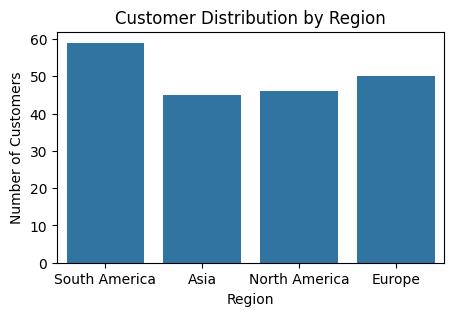

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


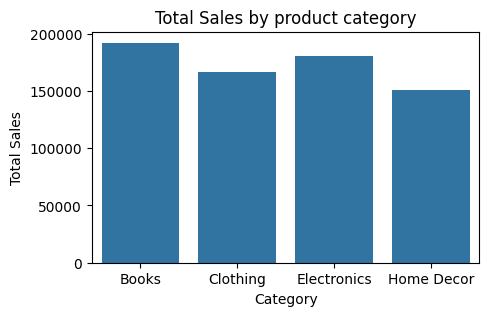

In [7]:
product_transactions = pd.merge(products, transactions, on='ProductID')
popular_categories = product_transactions.groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(5, 3))
sns.barplot(data=popular_categories, x='Category', y='TotalValue')
plt.title('Total Sales by product category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [8]:
customer_transactions = pd.merge(customers, transactions, on='CustomerID')
total_spending_by_region = customer_transactions.groupby('Region')['TotalValue'].sum().reset_index()
print(total_spending_by_region)

          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


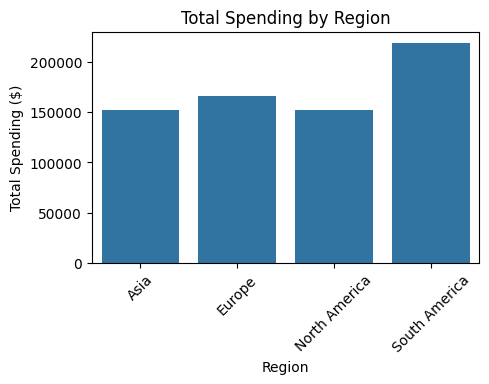

In [10]:
plt.figure(figsize=(5, 3))
sns.barplot(data=total_spending_by_region, x='Region', y='TotalValue')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.show()

In [11]:
product_transactions = pd.merge(products, transactions, on='ProductID')
product_transactions['PriceRange'] = pd.cut(product_transactions['Price_y'], bins =5, labels= ['0-50', '50-100', '100-150', '150-200', '200+'])
sales_by_price_range = product_transactions.groupby('PriceRange')['Quantity'].sum().reset_index()
print(sales_by_price_range)

  PriceRange  Quantity
0       0-50       402
1     50-100       468
2    100-150       533
3    150-200       486
4       200+       648


<ipython-input-11-5c69a8ba715e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range = product_transactions.groupby('PriceRange')['Quantity'].sum().reset_index()


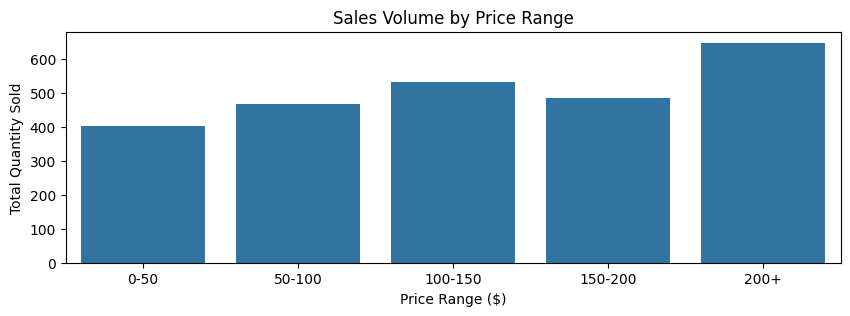

In [12]:
plt.figure(figsize=(10, 3))
sns.barplot(data=sales_by_price_range, x='PriceRange', y='Quantity')
plt.title('Sales Volume by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Total Quantity Sold')
plt.show()

In [13]:
customer_revenue  = customer_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue .columns = ['CustomerID', 'TotalRevenue']

customer_revenue = customer_revenue .sort_values(by='TotalRevenue', ascending=False)

top_10_percent = customer_revenue.head(int(len(customer_revenue) * 0.1))

top_10_percent['CumulativeRevenue'] = top_10_percent['TotalRevenue'].cumsum()

print("Top 10% of High-Value Customers:")
print(top_10_percent)

overall_total=customer_revenue['TotalRevenue'].sum()
print('Overall Total Revenue : ',overall_total)

top_10_proportion=131829.22/overall_total*100
print('Top 10% Customers proportion',top_10_proportion)

Top 10% of High-Value Customers:
    CustomerID  TotalRevenue  CumulativeRevenue
140      C0141      10673.87           10673.87
53       C0054       8040.39           18714.26
64       C0065       7663.70           26377.96
155      C0156       7634.45           34012.41
81       C0082       7572.91           41585.32
186      C0188       7111.32           48696.64
58       C0059       7073.28           55769.92
27       C0028       6819.57           62589.49
98       C0099       6715.72           69305.21
164      C0165       6708.10           76013.31
86       C0087       6604.23           82617.54
103      C0104       6579.10           89196.64
174      C0175       6210.53           95407.17
40       C0041       6149.78          101556.95
101      C0102       6132.36          107689.31
95       C0096       6072.92          113762.23
142      C0143       6044.63          119806.86
44       C0045       6021.80          125828.66
12       C0013       6000.56          131829.22
Overall

<ipython-input-13-d5ed59496443>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_percent['CumulativeRevenue'] = top_10_percent['TotalRevenue'].cumsum()


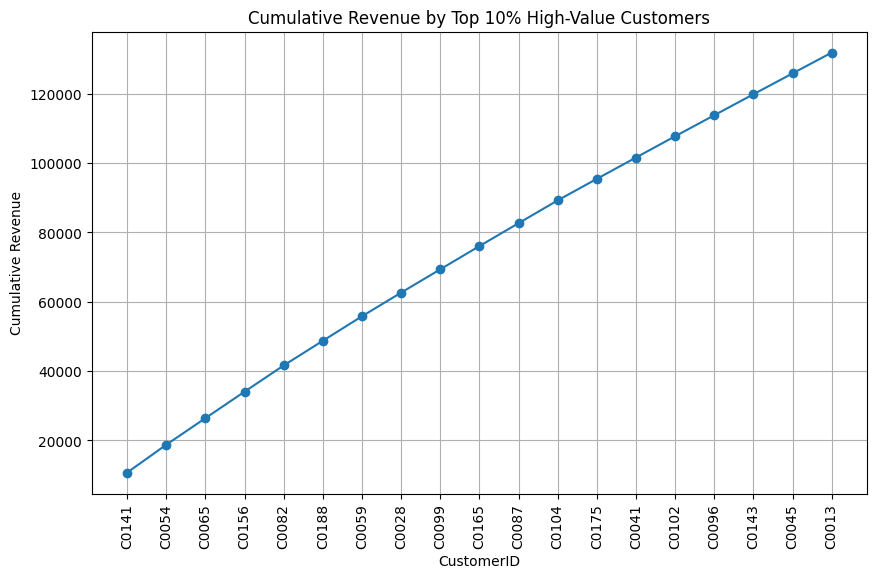

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_percent['CustomerID'], top_10_percent['CumulativeRevenue'], marker='o')
plt.title('Cumulative Revenue by Top 10% High-Value Customers')
plt.xlabel('CustomerID')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()